<a href="https://colab.research.google.com/github/nourhanOfTerra/CIFAR-10/blob/main/CIFAR10_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR-10 Classification Model: K-Nearest Neighbours

The overall guide: https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76

##Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/CIFAR-10')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing the necessary libraries

###General Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###Model Specific Libraris

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

##Importing the data from csv files to variables

In [8]:
df_extracted_features = pd.read_csv('extracted features.csv')
df_labels = pd.read_csv('labels.csv')

Now converting to numpy arrays as they are easier to deal with in the upcoming functions of the scikit-learn library.

In [13]:
extracted_features = df_extracted_features.to_numpy()
labels = df_labels.to_numpy()

##Dividing the data into training, validation and tesing sets

In [14]:
standard_extracted_features = StandardScaler().fit_transform(extracted_features)        # Necessary standardisation step
X_train, X_test, y_train, y_test = train_test_split(standard_extracted_features, labels, test_size = 0.2)

In [24]:
y_train = np.ravel(y_train, order = 'C')
y_test = np.ravel(y_test, order = 'C')

##Training and Cross Validation
What we can do to optimiza the number of neighbors is to plot the cross validation mean accuracy against the number of neighbors taken for a range from 1 to 500 neighbors for example.

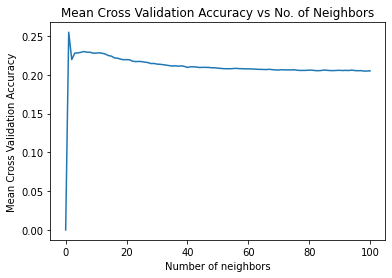

In [31]:
# # Meant to run only once
#accuracies = [0]
#no_of_neighbors = [0]
#for i in range (1, 101, 1):
  #no_of_neighbors.append(i)
  #knn = KNeighborsClassifier(n_neighbors = i)
  #cross_val_scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv = 5)               # y_train.values.ravel() To convert the labels to 1D array       
  #mean_cross_val = np.mean(cross_val_scores)
  #accuracies.append(mean_cross_val)

#plt.plot(no_of_neighbors, accuracies)
#plt.title('Mean Cross Validation Accuracy vs No. of Neighbors')
#plt.xlabel('Number of neighbors')
#plt.ylabel('Mean Cross Validation Accuracy')
#plt.savefig('Mean Cross Validation Accuracy vs No. of Neighbors.png')

Apparently, we can get the highest accuracy (25%) by putting the number of neighbors to be 1. The thing is, 1 Nearest Neighbor will cause overfitting of the model, and we don't want that now, do we? Every thing else will give nearly the same accuracy, so let's go with the conventional 5-NN to fit our model.

In [25]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

##Testing

In [26]:
y_predicted = knn.predict(X_test)
confused = confusion_matrix(y_test, y_predicted)
print("The confusion matrix: ")
print(confused)
report = classification_report(y_test, y_predicted)
print("\nThe classification report: ")
print(report)
acc_score = accuracy_score(y_test, y_predicted)
print("\nTest Accuracy: ", acc_score)

The confusion matrix: 
[[583   1 118   7 126   2  14   0 374   0]
 [267  57 150  27 283  11  42   0 402   0]
 [273   0 368  23 409   5  36   1  89   0]
 [307   2 242  95 341  22  52   1 101   0]
 [238   0 142  13 683   5  26   1  94   0]
 [301   0 295  66 372  41  47   2  84   0]
 [202   0 184  35 565   4 154   1  62   0]
 [213   0 252  32 492  16  36  45  88   0]
 [249   1  71  13 110   0  17   0 741   0]
 [187   2 198  45 300  11  32   5 388   8]]

The classification report: 
              precision    recall  f1-score   support

           0       0.21      0.48      0.29      1225
           1       0.90      0.05      0.09      1239
           2       0.18      0.31      0.23      1204
           3       0.27      0.08      0.13      1163
           4       0.19      0.57      0.28      1202
           5       0.35      0.03      0.06      1208
           6       0.34      0.13      0.19      1207
           7       0.80      0.04      0.07      1174
           8       0.31      0